In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Загрузка данных из Excel файла
df = pd.read_excel('/content/Raisin_Dataset.xlsx')

# Вывод первых нескольких строк датафрейма
print(df.head())

# Статистическая информация
print(df.describe())

# Названия столбцов
print("Названия столбцов:", df.columns)

# Названия строк (индексы)
print("Названия строк:", df.index)

    Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0  87524       442.246011       253.291155      0.819738       90546   
1  75166       406.690687       243.032436      0.801805       78789   
2  90856       442.267048       266.328318      0.798354       93717   
3  45928       286.540559       208.760042      0.684989       47336   
4  79408       352.190770       290.827533      0.564011       81463   

     Extent  Perimeter    Class  
0  0.758651   1184.040  Kecimen  
1  0.684130   1121.786  Kecimen  
2  0.637613   1208.575  Kecimen  
3  0.699599    844.162  Kecimen  
4  0.792772   1073.251  Kecimen  
                Area  MajorAxisLength  MinorAxisLength  Eccentricity  \
count     900.000000       900.000000       900.000000    900.000000   
mean    87804.127778       430.929950       254.488133      0.781542   
std     39002.111390       116.035121        49.988902      0.090318   
min     25387.000000       225.629541       143.710872      0.348730   
25%

In [ ]:
# Преобразование Class в числовые значения
df['Class'] = df['Class'].map({'Kecimen': 0, 'Besni': 1})

# Выбираем признаки (исключаем Class)
X = df.drop('Class', axis=1)
y = df['Class'] # Истинные метки классов

# Масштабирование данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Разделение на тренировочный и тестовый наборы (для оценки точности)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Accuracy K-means: 0.7777777777777778
Confusion Matrix K-means:
[[92  2]
 [38 48]]


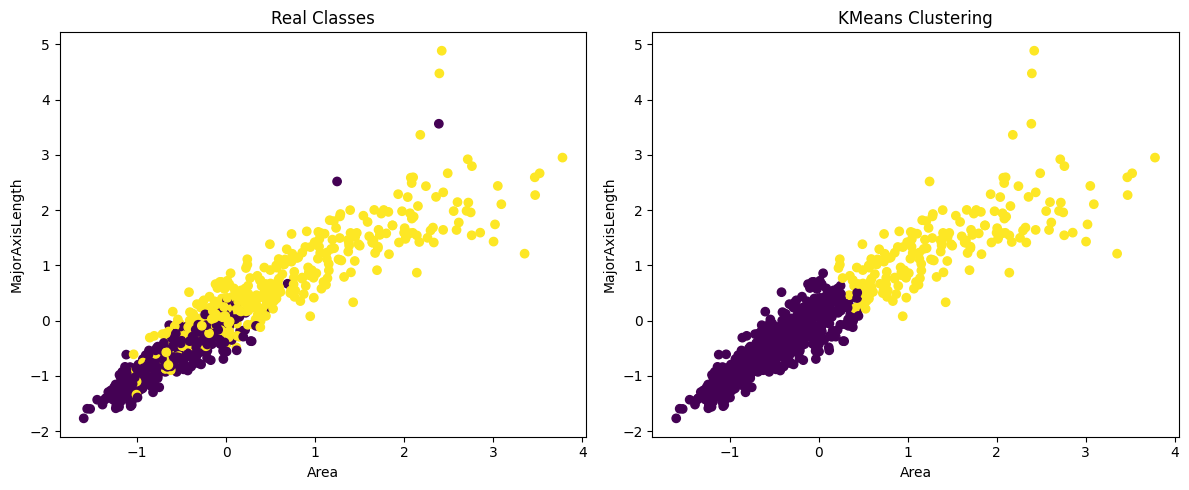

In [ ]:
# K-means
kmeans = KMeans(n_clusters=2, random_state=0) # 2 кластера, так как у нас 2 класса
kmeans.fit(X_train)
labels_kmeans_train = kmeans.predict(X_train)
labels_kmeans_test = kmeans.predict(X_test)


# Оценка точности
accuracy_kmeans = accuracy_score(y_test, labels_kmeans_test)
print(f"Accuracy K-means: {accuracy_kmeans}")

# Матрица ошибок
cm_kmeans = confusion_matrix(y_test, labels_kmeans_test)
print(f"Confusion Matrix K-means:\n{cm_kmeans}")

# Визуализация (только для двух наиболее информативных признаков)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_train['Area'], X_train['MajorAxisLength'], c=y_train, cmap='viridis', label='Real')
plt.title('Real Classes')
plt.xlabel('Area')
plt.ylabel('MajorAxisLength')

plt.subplot(1, 2, 2)
plt.scatter(X_train['Area'], X_train['MajorAxisLength'], c=labels_kmeans_train, cmap='viridis', label='KMeans')
plt.title('KMeans Clustering')
plt.xlabel('Area')
plt.ylabel('MajorAxisLength')

plt.tight_layout()
plt.show()

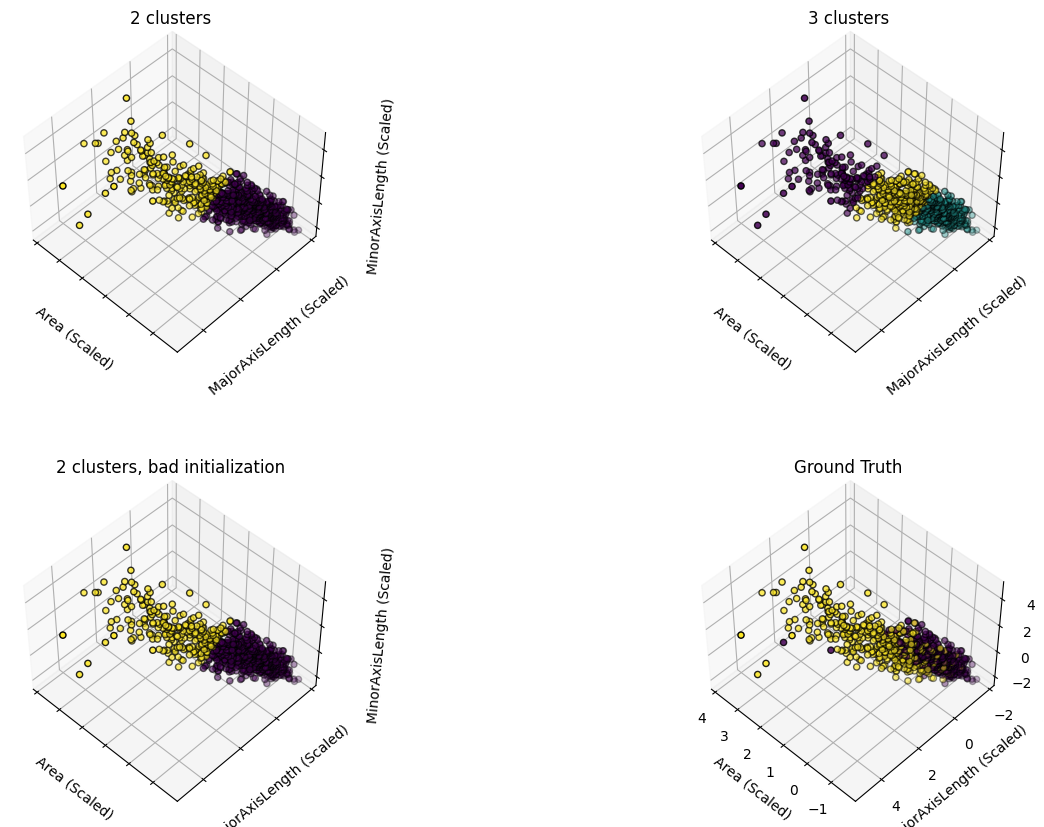

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Загрузка данных (уже сделано ранее)
data = pd.read_excel('/content/Raisin_Dataset.xlsx')
data['Class'] = data['Class'].map({'Kecimen': 0, 'Besni': 1})
X = data.drop('Class', axis=1)
y = data['Class']

# Выбираем три наиболее информативных признака для 3D визуализации.
# Здесь я выбираю Area, MajorAxisLength, MinorAxisLength.
X_selected = X[['Area', 'MajorAxisLength', 'MinorAxisLength']]

# Масштабирование данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)
X_scaled = pd.DataFrame(X_scaled, columns=['Area', 'MajorAxisLength', 'MinorAxisLength'])


estimators = [
    ("k_means_raisin_2", KMeans(n_clusters=2)), # 2 кластера, так как 2 класса в данных
    ("k_means_raisin_3", KMeans(n_clusters=3)), # Попробуем 3, для сравнения
    ("k_means_raisin_bad_init", KMeans(n_clusters=2, n_init=1, init="random")), # Плохая инициализация
]

fig = plt.figure(figsize=(15, 10))
titles = ["2 clusters", "3 clusters", "2 clusters, bad initialization"]

for idx, ((name, est), title) in enumerate(zip(estimators, titles)):
    ax = fig.add_subplot(2, 2, idx + 1, projection="3d", elev=48, azim=134)
    est.fit(X_scaled)
    labels = est.labels_

    ax.scatter(X_scaled["Area"], X_scaled["MajorAxisLength"], X_scaled["MinorAxisLength"], c=labels.astype(float), edgecolor="k")

    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])
    ax.set_xlabel("Area (Scaled)")
    ax.set_ylabel("MajorAxisLength (Scaled)")
    ax.set_zlabel("MinorAxisLength (Scaled)")
    ax.set_title(title)

# Plot the ground truth
ax = fig.add_subplot(2, 2, 4, projection="3d", elev=48, azim=134)
ax.scatter(X_scaled['Area'], X_scaled['MajorAxisLength'], X_scaled['MinorAxisLength'], c=y, edgecolor='k')
ax.set_xlabel("Area (Scaled)")
ax.set_ylabel("MajorAxisLength (Scaled)")
ax.set_zlabel("MinorAxisLength (Scaled)")
ax.set_title("Ground Truth")

plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

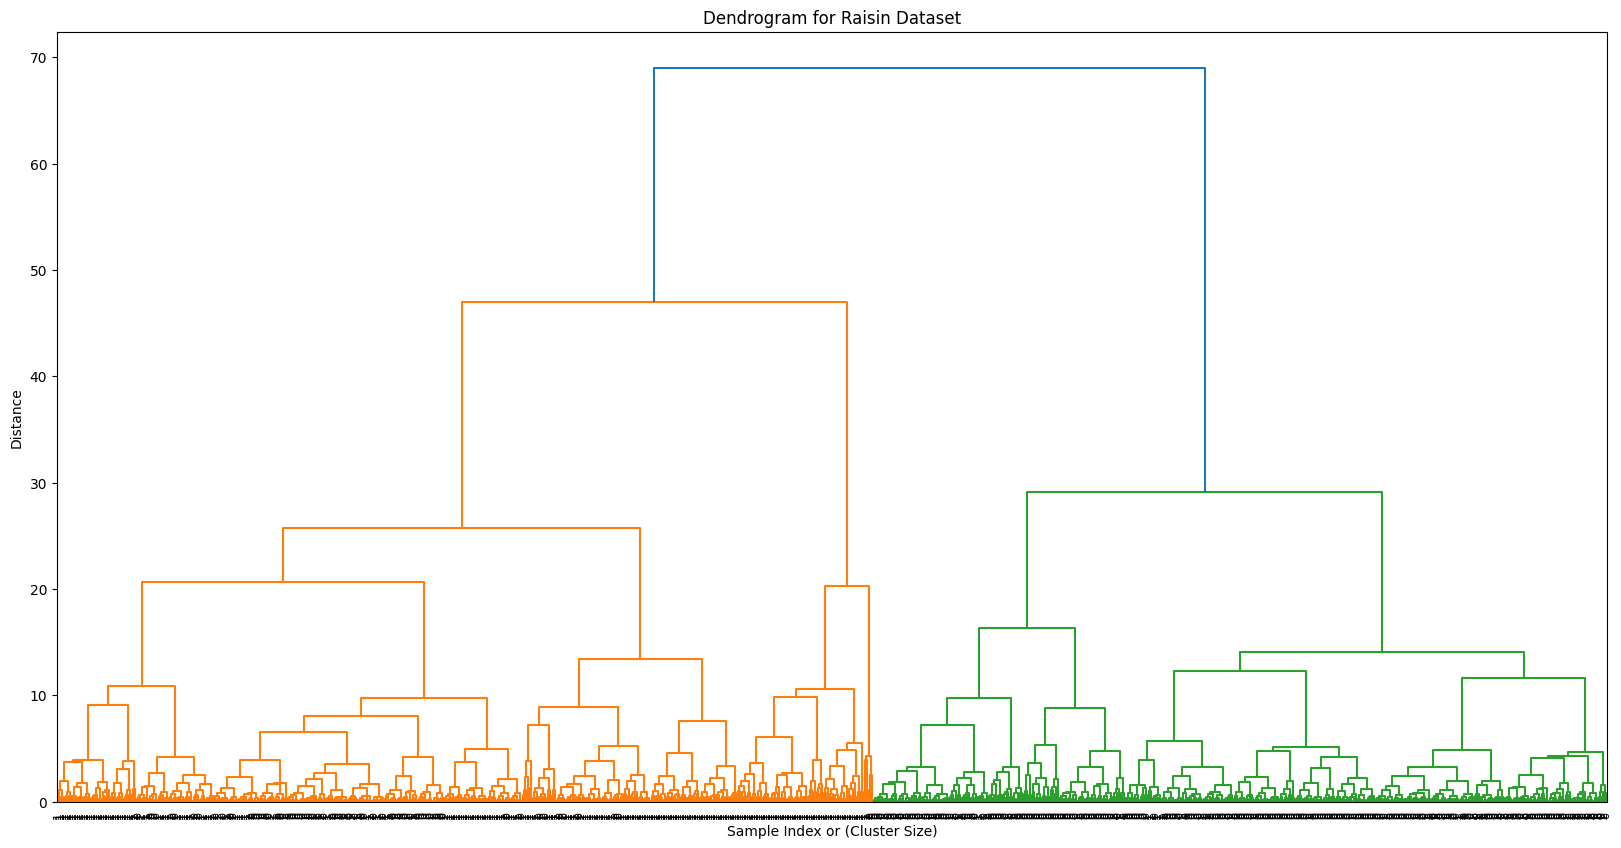

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler

# Загрузка данных (уже сделано ранее)
data = pd.read_excel('/content/Raisin_Dataset.xlsx')
data['Class'] = data['Class'].map({'Kecimen': 0, 'Besni': 1})
X = data.drop('Class', axis=1)
y = data['Class']

# Масштабирование данных (важно для иерархической кластеризации)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Выполняем иерархическую кластеризацию.  'ward' - один из методов, можно попробовать другие.
mergings = linkage(X_scaled, method='ward')  # Попробуйте 'complete', 'average', 'single'

# Строим дендрограмму
plt.figure(figsize=(20, 10))  # Увеличили размер для лучшей читаемости
dendrogram(mergings,
           labels=y.astype(str).to_list(), # Преобразуем метки в строки
           leaf_rotation=90,
           leaf_font_size=8,  # Увеличили размер шрифта меток
           orientation='top', # Положение дендрограммы
           distance_sort='descending' # Сортировка по расстоянию
          )
plt.title('Dendrogram for Raisin Dataset')
plt.xlabel('Sample Index or (Cluster Size)')
plt.ylabel('Distance')
plt.show()

Best parameters: eps=1.15, min_samples=9, silhouette=0.6312931606582826
Accuracy DBSCAN: 0.49442896935933145
Confusion Matrix DBSCAN:
[[355   0]
 [363   0]]
Silhouette Score DBSCAN: 0.5333028830580653


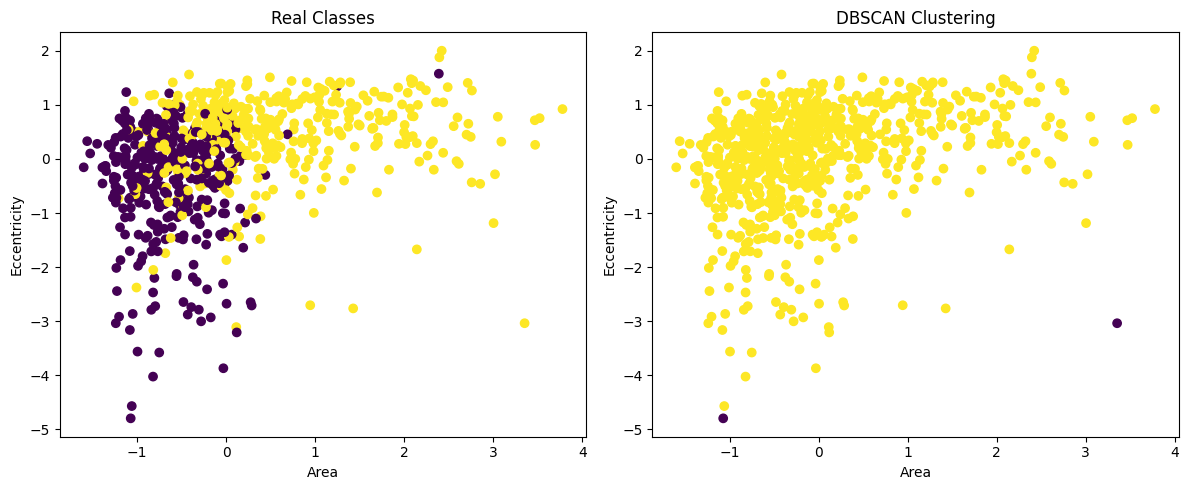

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, silhouette_score

# Загрузка данных
data = pd.read_excel('/content/Raisin_Dataset.xlsx')
data['Class'] = data['Class'].map({'Kecimen': 0, 'Besni': 1})
X = data.drop('Class', axis=1)

# Масштабирование данных (важно для DBSCAN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Обучающая и тестовая выборка
X_train, X_test, y_train, y_test = train_test_split(X_scaled, data['Class'], test_size=0.2, random_state=42)

# Выбираем два наиболее информативных признака
X_selected_train = X_train[['Area', 'Eccentricity']]
X_selected_test = X_test[['Area', 'Eccentricity']]

# Подбор параметров с использованием метрики силуэта
best_silhouette = -1
best_eps = 0
best_min_samples = 0

for eps in np.arange(0.3, 1.5, 0.05):
    for min_samples in range(5, 20):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(X_selected_train)
        labels = dbscan.labels_

        if len(set(labels)) >= 1:  # Допускаем один кластер и шум
            silhouette = silhouette_score(X_selected_train, labels)
            if silhouette > best_silhouette:
                best_silhouette = silhouette
                best_eps = eps
                best_min_samples = min_samples
print(f"Best parameters: eps={best_eps}, min_samples={best_min_samples}, silhouette={best_silhouette}")
# Обучение DBSCAN с лучшими параметрами
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan.fit(X_selected_train)
labels_dbscan_train = dbscan.labels_
labels_dbscan_test = dbscan.fit_predict(X_selected_test)
# Оценка точности (DBSCAN может иметь шумные точки, которые нужно обработать)

# Удаляем шумные точки (-1) для оценки точности
mask_train = labels_dbscan_train != -1
mask_test = labels_dbscan_test != -1

accuracy_dbscan = accuracy_score(y_train[mask_train], labels_dbscan_train[mask_train])
print(f"Accuracy DBSCAN: {accuracy_dbscan}")

# Матрица ошибок
cm_dbscan = confusion_matrix(y_train[mask_train], labels_dbscan_train[mask_train])
print(f"Confusion Matrix DBSCAN:\n{cm_dbscan}")

silhouette_dbscan = silhouette_score(X_train, labels_dbscan_train)
print(f"Silhouette Score DBSCAN: {silhouette_dbscan}")

# Визуализация (только для двух наиболее информативных признаков)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_train['Area'], X_train['Eccentricity'], c=y_train, cmap='viridis', label='Real')
plt.title('Real Classes')
plt.xlabel('Area')
plt.ylabel('Eccentricity')

plt.subplot(1, 2, 2)
plt.scatter(X_train['Area'], X_train['Eccentricity'], c=labels_dbscan_train, cmap='viridis', label='DBSCAN')
plt.title('DBSCAN Clustering')
plt.xlabel('Area')
plt.ylabel('Eccentricity')

plt.tight_layout()
plt.show()